<a href="https://colab.research.google.com/github/ZarAhmed/MyMLWork/blob/zareefaltaf/PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/diabetes dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


To perform PCA, we need our data to be in a Normal Standard Form where mean is and normal is 1. So we will use StandardScaler to do this job.


In [ ]:
#drop the outcome column
df.drop(columns='Outcome', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


The next step is to generate a covariance matrix.

In [ ]:
df_cov = df_scaled.cov()
df_cov

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
Glucose,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
BloodPressure,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
SkinThickness,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
Insulin,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
BMI,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
DiabetesPedigreeFunction,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
Age,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


Calculate the Eigen Values and Vectors using the covariance matrix:

Eigen values are the scalar values that indicate the magnitude of the variance captured by each principal component in PCA

Eigen vector represent the direction of pricipal components in the feature space. Each eigenvector corresponds to an eigenvalue and defines the direction of maximum variance in the data.

In [ ]:
EigenValues, EigenVectors = np.linalg.eig(df_cov)
EigenValues

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

Selection PC:

To determine the principal components, we typically sort the eigenvalues in descending order and select the top eigenvalues and their corresponding eigenvectors. Here, we will use 0th, 1st and 7th indexed eigenValues.

In [ ]:
PC1_data = df_scaled @ EigenVectors[:, 0]
PC2_data = df_scaled @ EigenVectors[:, 1]
PC3_data = df_scaled @ EigenVectors[:, 7]

PCA Implementation via the sklearn library


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(df_scaled)


array([[ 1.06850273,  1.23489499, -0.09592984],
       [-1.12168331, -0.73385167,  0.71293816],
       [-0.39647671,  1.59587594, -1.76067844],
       ...,
       [-0.28347525,  0.09706503,  0.07719194],
       [-1.06032431,  0.83706234, -0.42503045],
       [-0.83989172, -1.15175485,  1.00917817]])

Calculate the explained variance ratio:

The explained variance ratio is a critical step in PCA that indicates the proportion of the dataset's variance captured by each principal component. The explained variance ratio helps in understanding how much information (variance) is retained by each principal component. In the example above, pca.explained_variance_ratio_ returns an array of the variance ratios for the selected components. By examining these ratios, we can determine the importance of each principal component in explaining the variability of the data. Higher values indicate components that capture more variance, and this helps in deciding how many principal components to retain for effective dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(df_scaled)
pca.explained_variance_ratio_


array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

Visualizing Cumulative Explained Variance in PCA:

In this plot, we are visualizing the cumulative explained variance ratio for the principal components of the dataset after applying PCA. The x-axis represents the number of principal components (dimensions), and the y-axis represents the cumulative explained variance ratio.

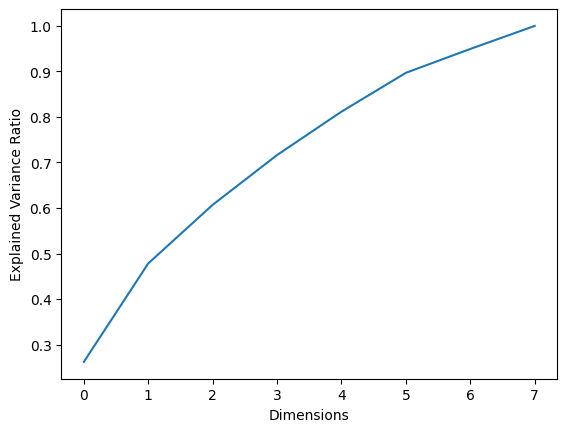

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.savefig("ScreenPlot.png")
plt.show()


Here, we must check the value on x axis when the line crosses 0.9(90% of data) on y axis.
That value on x axis is the value for the parameter of PCA for n_components
